# NYC_Taxi_Trip_Duration

In [ ]:
#id - a unique identifier for each trip
#vendor_id - a code indicating the provider associated with the trip record
#pickup_datetime - date and time when the meter was engaged
#dropoff_datetime - date and time when the meter was disengaged
#passenger_count - the number of passengers in the vehicle (driver entered value)
#pickup_longitude - the longitude where the meter was engaged
#pickup_latitude - the latitude where the meter was engaged
#dropoff_longitude - the longitude where the meter was disengaged
#dropoff_latitude - the latitude where the meter was disengaged
#store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor 
#because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
#trip_duration - (target) duration of the trip in seconds

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt

In [3]:
df=pd.read_csv('Downloads/nyc_taxi_trip_duration.csv')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
df.shape

(729322, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


max for vendor is 2 and min is 1 which is correct it have only 2 unique values and
trip_duration has very small values and
there is zero in passanger count which may be due to incorrect entry or may be trip was canceled or driver put it to complete it trip target 

# Feature Creation

In [11]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [12]:
## pickup_datatime and dropoff_datatime both are object type that why we are not able to know much more from them. 
##due to of this we have to change their data type from ojbect to datetime

In [13]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [14]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [15]:
df['pickupday_name']=df['pickup_datetime'].dt.day_name()
df['drop_day_name']=df['dropoff_datetime'].dt.day_name()
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['drop_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month_name()
df['dropoff_month']=df['dropoff_datetime'].dt.month_name()

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickupday_name,drop_day_name,pickup_hour,drop_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16,16,February,February
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23,23,March,March
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17,18,February,February
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,9,10,January,January
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,6,6,February,February


In [17]:
def time_of_day(x):
    if x in range(5,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [18]:
df['pickup_time_of_day']=df['pickup_hour'].apply(time_of_day)
df['dropoff_time_of_day']=df['drop_hour'].apply(time_of_day)

In [19]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickupday_name,drop_day_name,pickup_hour,drop_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16,16,February,February,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23,23,March,March,Late Night,Late Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17,18,February,February,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,9,10,January,January,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,6,6,February,February,Morning,Morning


In [20]:
from geopy.distance import great_circle

In [21]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinate=(pickup_lat,pickup_long)
    stop_coordinate=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinate,stop_coordinate).km

In [22]:
df['distance']=df.apply(lambda x:cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickupday_name,drop_day_name,pickup_hour,drop_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,16,16,February,February,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,23,23,March,March,Late Night,Late Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,17,18,February,February,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,9,10,January,January,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,6,6,February,February,Morning,Morning,4.328540


# Univariate Analysis

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

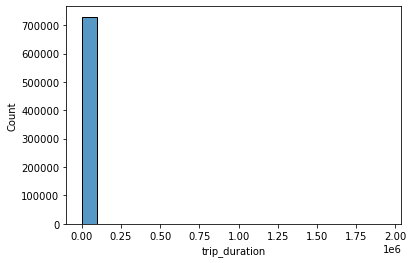

In [24]:
sns.histplot(df['trip_duration'],kde=False,bins=20)

In [25]:
## there is  a lot of skewness

f:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

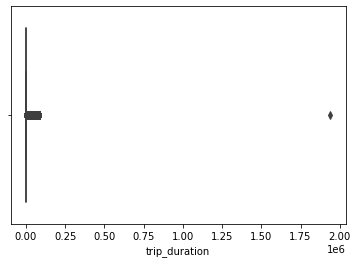

In [26]:
sns.boxplot(df['trip_duration'])

Thus we see there is one value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated

In [28]:
df['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In term of outlier treatment we drop the 1st largets value  which have high difference from 3rd and 2nd larget value 

In [29]:
df.drop(df[df['trip_duration']==1939736].index,inplace=True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

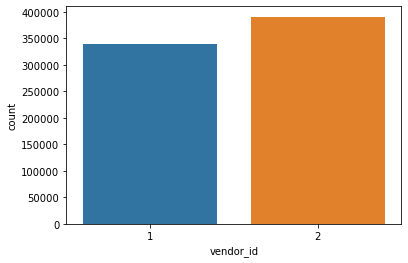

In [30]:
sns.countplot(x='vendor_id',data=df)

Its clear from that the vendor_id 2 did more trips as compare to vendor 1 but there is not much difference between their trip

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

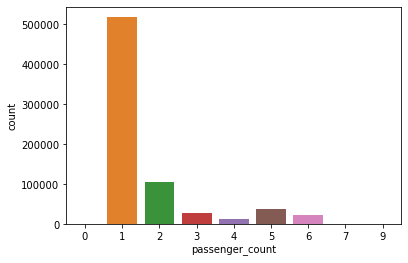

In [31]:
sns.countplot(x='passenger_count',data=df)

In [32]:
df['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [33]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [34]:
df['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [35]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

we see that less than 1% trip store forward 

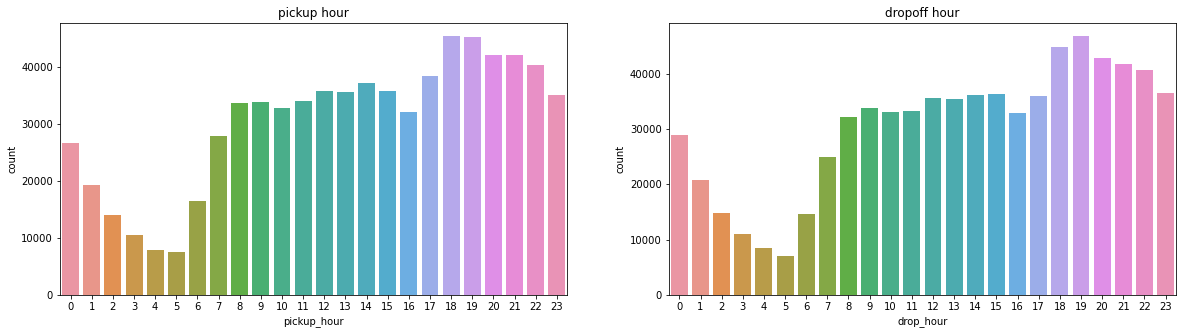

In [36]:
figer,(asx1,asx2)=plt.subplots(ncols=2,figsize=(20,5))
asx1.set_title('pickup hour')
asx2.set_title('dropoff hour')

a=sns.countplot(x='pickup_hour',data=df,ax=asx1)
b=sns.countplot(x='drop_hour',data=df,ax=asx2)

look the busiest hour is 6 pm to 7 pm and that make sense people returning from their offices

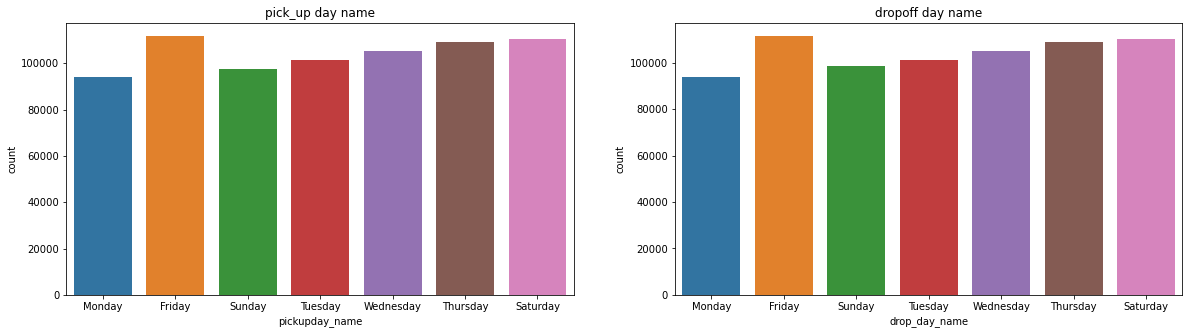

In [37]:
figer,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('pick_up day name')
ax2.set_title('dropoff day name')

a=sns.countplot(x='pickupday_name',data=df,ax=ax1)
b=sns.countplot(x='drop_day_name',data=df,ax=ax2)

we see friday is the busiest day followed by saturday

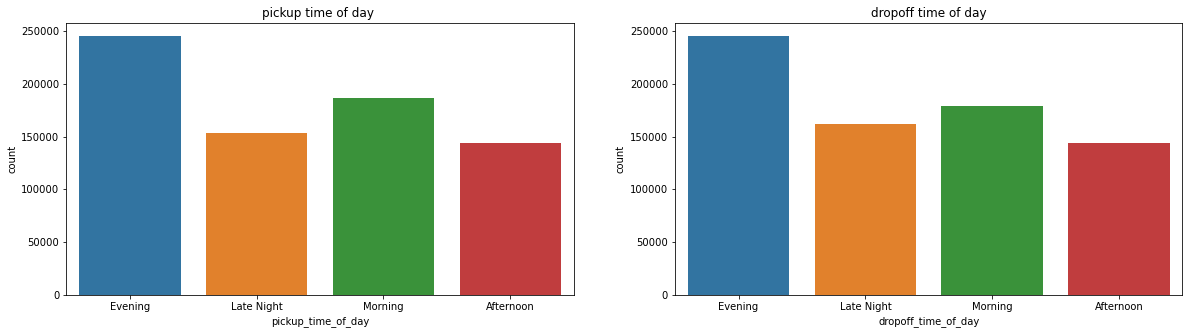

In [38]:
figer,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('pickup time of day ')
ax2.set_title('dropoff time of day')

a=sns.countplot(x='pickup_time_of_day',data=df,ax=ax1)
b=sns.countplot(x='dropoff_time_of_day',data=df,ax=ax2)

we see Evening is busiest time 

# Bivariate Analysis

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

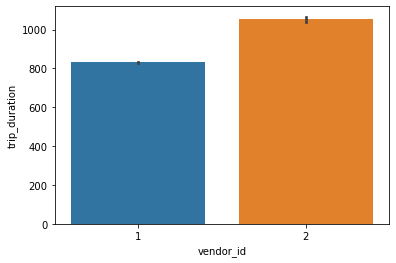

In [39]:
sns.barplot(x='vendor_id',y='trip_duration',data=df)

vendor 2 take longer trips as compare to vendor 1

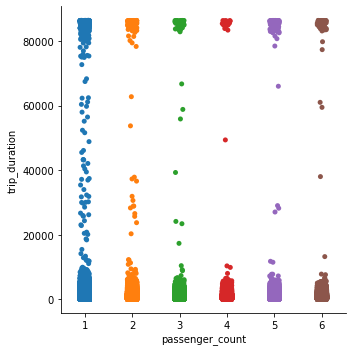

In [40]:
sns.catplot(x='passenger_count',y='trip_duration',data=df)

There is no relationship between trip_duration and passenger_count

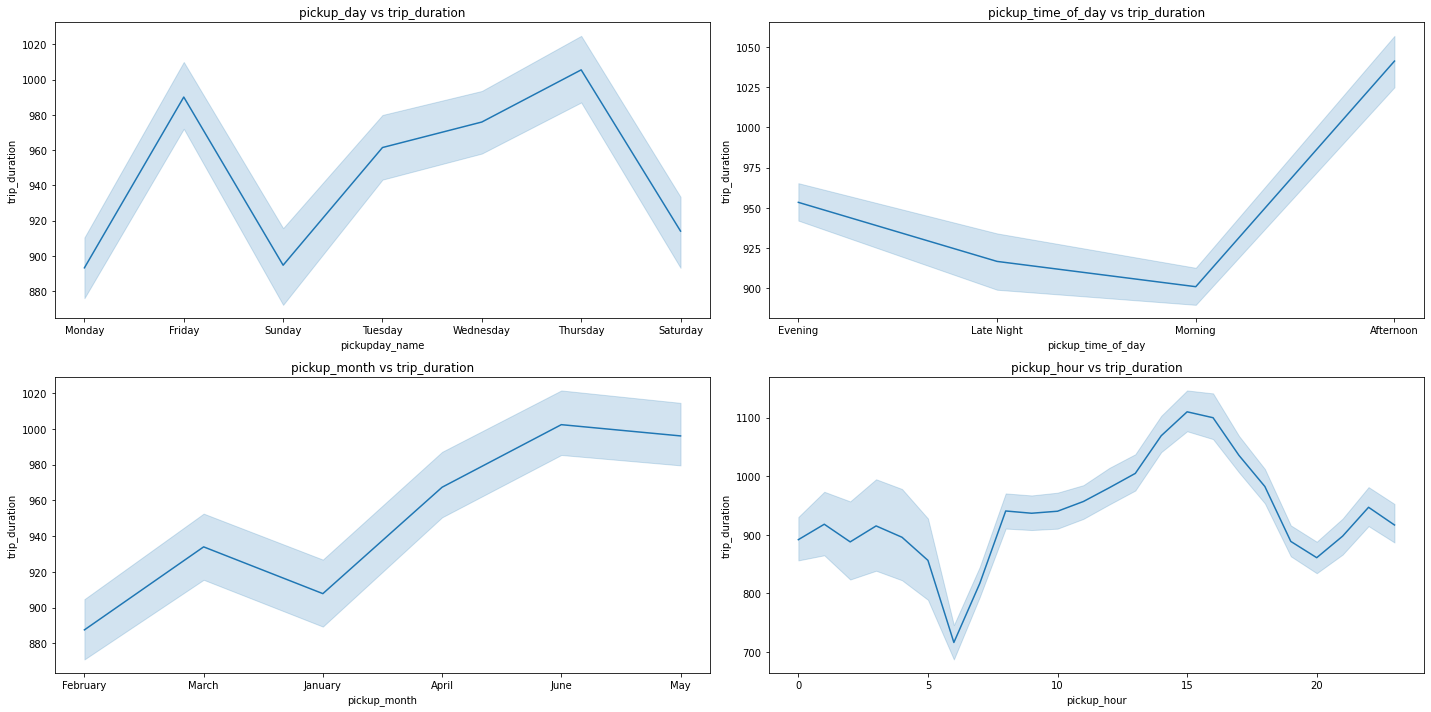

In [41]:
figer,ax=plt.subplots(2,2,figsize=(20,10))
ax[0][0].set_title('pickup_day vs trip_duration')
ax[0][1].set_title('pickup_time_of_day vs trip_duration')
ax[1][0].set_title('pickup_month vs trip_duration')
ax[1][1].set_title('pickup_hour vs trip_duration')

a=sns.lineplot(x='pickupday_name',y='trip_duration',data=df,ax=ax[0][0])
b=sns.lineplot(x='pickup_time_of_day',y='trip_duration',data=df,ax=ax[0][1])
c=sns.lineplot(x='pickup_month',y='trip_duration',data=df,ax=ax[1][0])
d=sns.lineplot(x='pickup_hour',y='trip_duration',data=df,ax=ax[1][1])

figer.tight_layout()

1-Thursday has the highest trip duration followed by friday

2-Around 3 pm in afternoon the trip duration is highest may be due to traffic and around 6 am in the trip duration is lowest as the road has low traffic during morning

3-we see that after january there is gradualy increase in trip durations

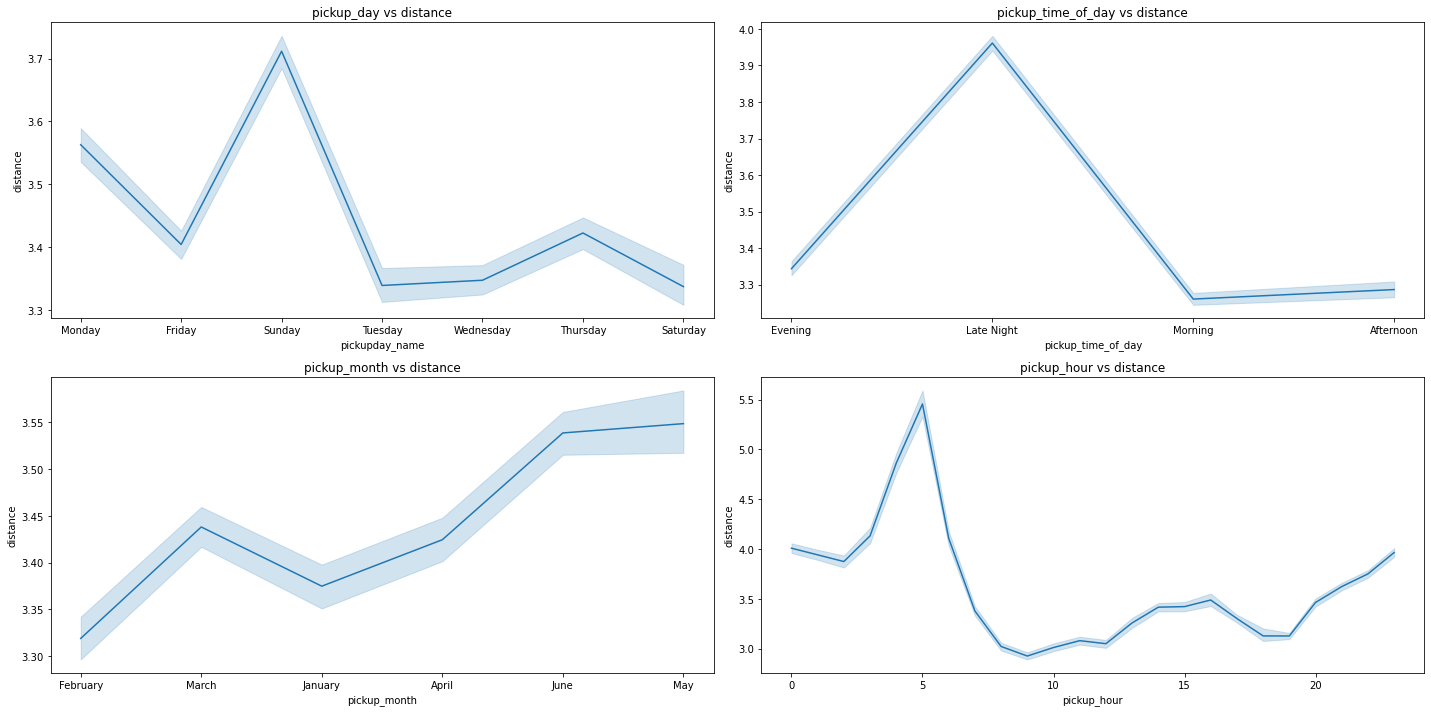

In [42]:
figer,ax=plt.subplots(2,2,figsize=(20,10))
ax[0][0].set_title('pickup_day vs distance')
ax[0][1].set_title('pickup_time_of_day vs distance')
ax[1][0].set_title('pickup_month vs distance')
ax[1][1].set_title('pickup_hour vs distance')

a=sns.lineplot(x='pickupday_name',y='distance',data=df,ax=ax[0][0])
b=sns.lineplot(x='pickup_time_of_day',y='distance',data=df,ax=ax[0][1])
c=sns.lineplot(x='pickup_month',y='distance',data=df,ax=ax[1][0])
d=sns.lineplot(x='pickup_hour',y='distance',data=df,ax=ax[1][1])

figer.tight_layout()

1-Distances are longer on sunday because due to weekend or  probabily their is outstation trip on sunday

2-Trip distance is longer on late night or early in moring around 4-6 am it may be probabily point to the outstation trip where people start early for the day

3-Trip distance is highest in month of june where as its was lowest in month of february

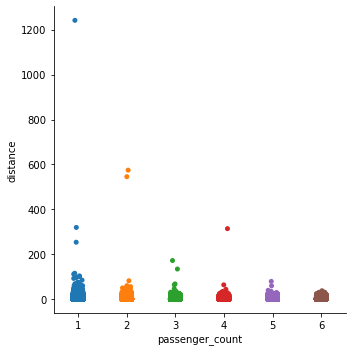

In [43]:
sns.catplot(x='passenger_count',y='distance',data=df)

passenger 1,2or 4 take a longer distance trips in as compare to other ones

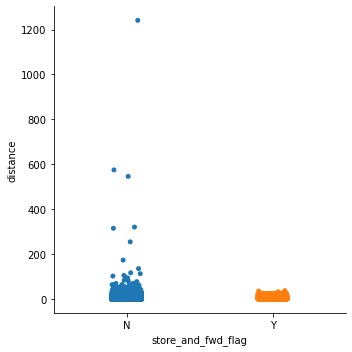

In [44]:
sns.catplot(x='store_and_fwd_flag',y='distance',data=df)

we see longer distance rides as not stored

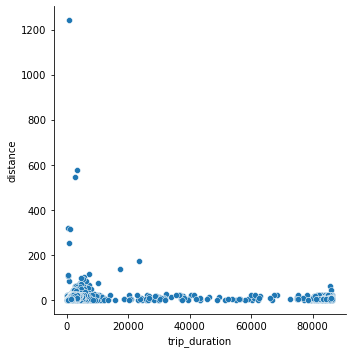

In [45]:
sns.relplot(y='distance',x='trip_duration',data=df)

We can see there are trips with trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance have long trip durations

distance recorded zero and trip duration is definitely more which means that the dropoff location were not recorded

Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time


In [46]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

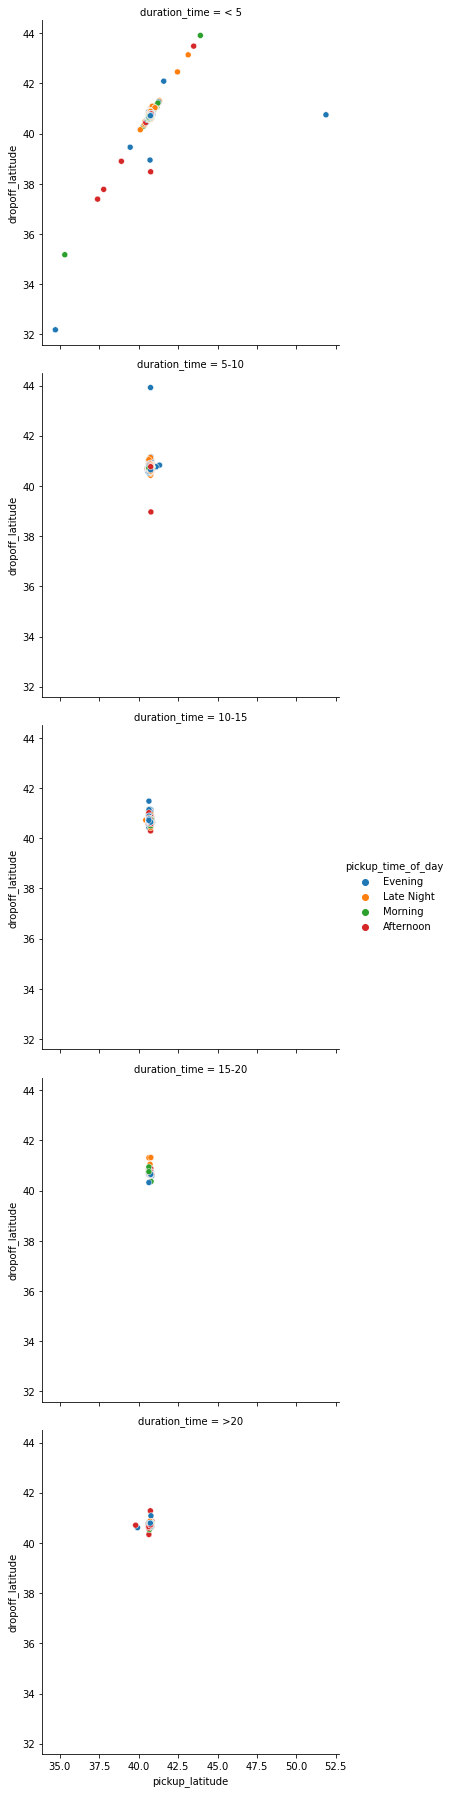

In [47]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_time_of_day',row='duration_time',data=df)

for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 ° and
for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.

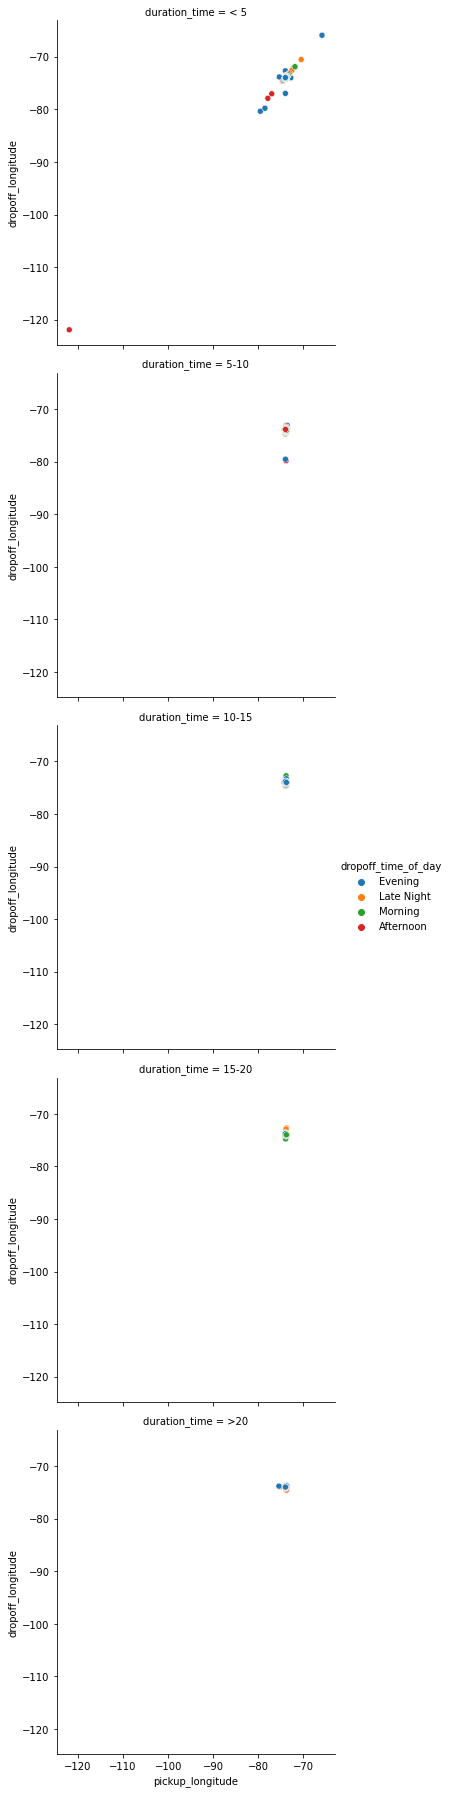

In [48]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='dropoff_time_of_day',row='duration_time',data=df)

For shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120 ° .
For longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 °

# conclusion

1-we see most of the trip was on Friday,Saturday and Thursday

2-Thursday has the highest trip duration followed by friday

3- Trip Distances are longer on sunday

4- we see the busiest hour is 6 pm to 7 pm during this evening time trip duration recorded highest and 
that make sense people   returning from their offices

5-vendor 2 take longer trips as compare to vendor 1

6-passenger_count 1,2 or 4 take a longer distance trips  as compare to other passengers

7-we see longer distance rides are not stored

8-The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)